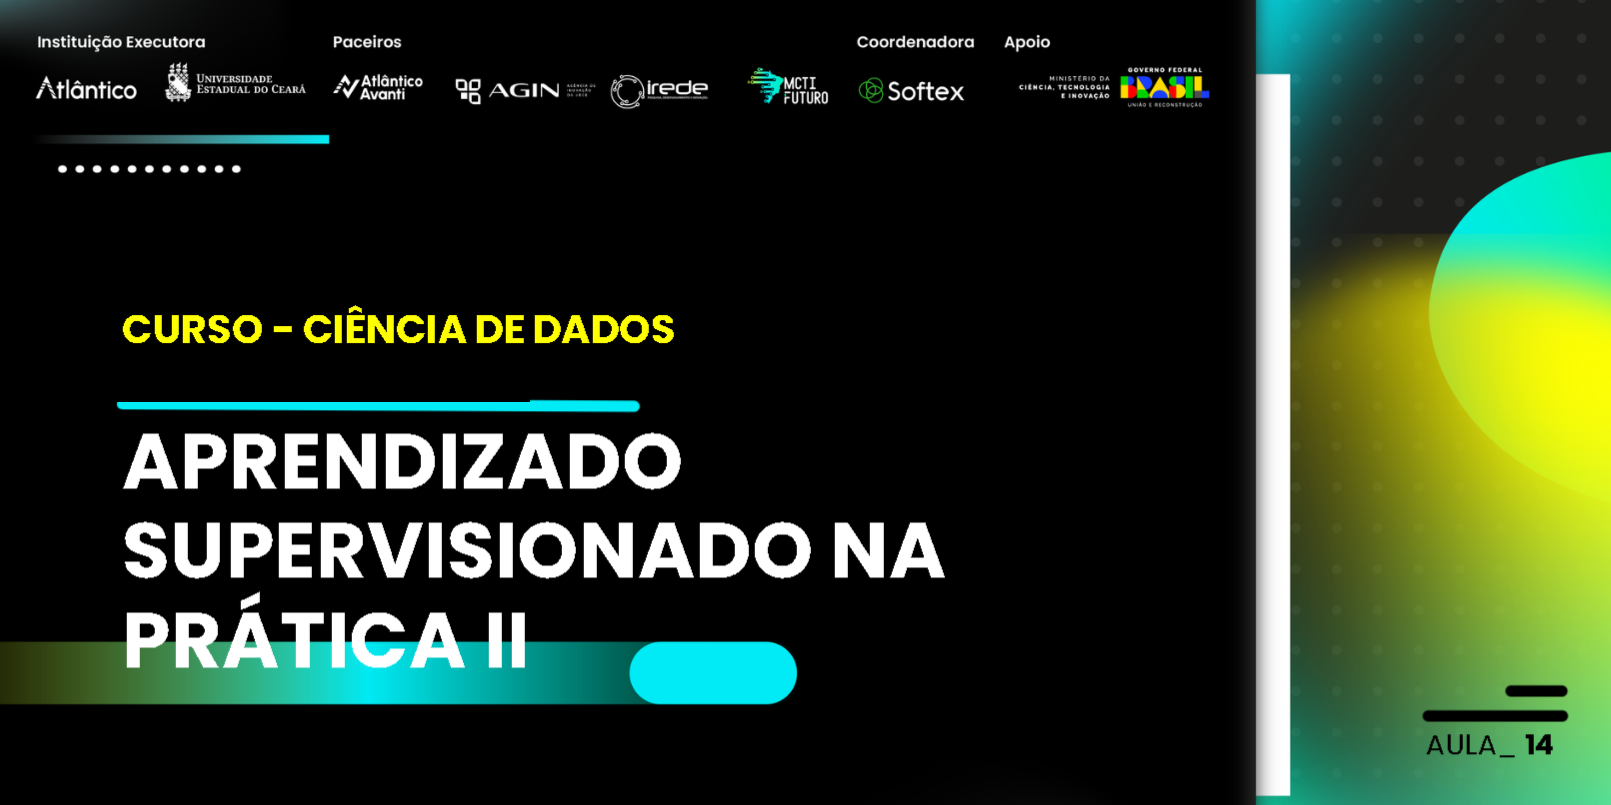



# Aula sobre Aprendizado Supervisionado

## Introdução

Nesta aula, vamos explorar o conceito de aprendizado supervisionado, um dos pilares da inteligência artificial e ciência de dados. O aprendizado supervisionado é um método de aprendizado de máquina onde um modelo é treinado utilizando dados rotulados, ou seja, cada entrada possui uma saída associada.

### Objetivos:
1. Entender os conceitos teóricos do aprendizado supervisionado.
2. Conhecer os tipos de problemas: regressão e classificação.
3. Implementar exemplos práticos de classificação e regressão utilizando Python.
4. Trabalhar com datasets mais desafiadores e menos comuns, aprofundando as análises e interpretações.
5. Discutir os desafios e limitações do aprendizado supervisionado.



# Teoria: O que é Aprendizado Supervisionado?

No aprendizado supervisionado, o modelo aprende uma função a partir de dados de treinamento que possuem rótulos. Esse processo é iterativo e ajusta os parâmetros do modelo para minimizar o erro entre as previsões do modelo e os rótulos reais.

### Principais componentes:
1. **Conjunto de Dados**:
   - **Entradas (X)**: As características ou atributos usados para fazer a previsão.
   - **Saídas (y)**: Os rótulos ou valores-alvo que o modelo deve aprender a prever.


2. **Modelo**:
   - O modelo é a representação matemática ou algorítmica que aprende a mapear as entradas para as saídas.


3. **Função de Perda**:
   - Mede o erro entre a previsão do modelo e o rótulo real.
   - Exemplos:
     - Erro Quadrático Médio (MSE) para regressão.
     - Entropia Cruzada para classificação.


4. **Otimização**:
   - Processo de ajuste dos parâmetros do modelo para minimizar a função de perda.
   - Algoritmos comuns: Gradiente Descendente e suas variantes.


### Tipos de problemas:

1. **Classificação**:
   - Objetivo: Prever categorias discretas.
   - Algoritmos populares:
     - Regressão Logística.
     - Árvores de Decisão.
     - K -NN.
     - Random Forest.
     - Suport Vector Machines (SVM).


2. **Regressão**:
   - Objetivo: Prever valores contínuos.
   - Algoritmos populares:
     - Regressão Linear.
     - Regressão Ridge.
     - Gradient Boosting Regressor.


### Vantagens do Aprendizado Supervisionado:

1. Alta precisão quando os dados são bem rotulados.
2. Modelos interpretáveis (em alguns casos, como Regressão Linear).
3. Facilidade de avaliação por métricas específicas como acurácia, precisão e recall.


### Limitações do Aprendizado Supervisionado:

1. **Dependência de Dados Rotulados**:
   - Rotular grandes conjuntos de dados pode ser caro e demorado.


2. **Overfitting**:
   - O modelo pode se ajustar muito bem aos dados de treinamento e ter dificuldade com novos dados.


3. **Desequilíbrio de Classes**:
   - Desempenho prejudicado se o conjunto de dados tiver classes desbalanceadas.


4. **Generalização**:
   - Desafios para generalizar bem em cenários do mundo real com dados desconhecidos.


### Métricas de Avaliação







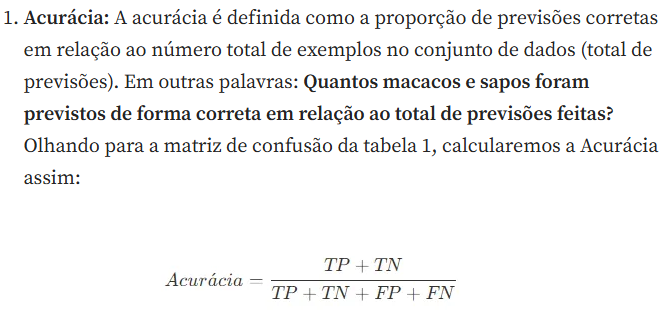

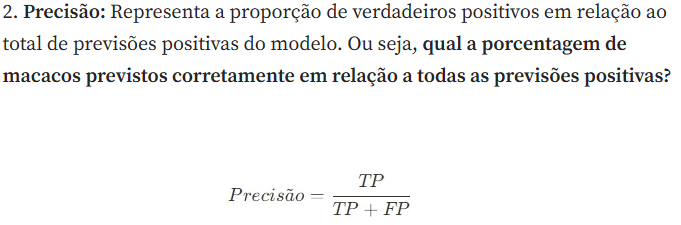

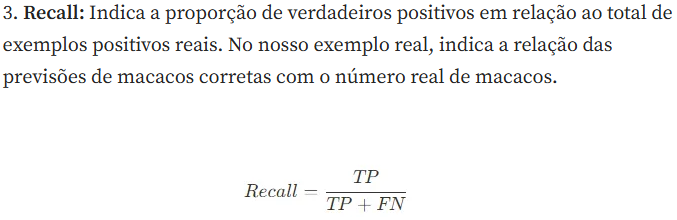

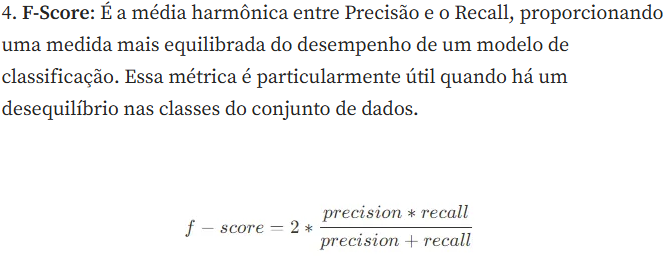

### Etapas do processo de aprendizado:
1. Coleta de dados.
2. Pré-processamento e limpeza dos dados.
3. Divisão do conjunto de dados (treinamento e teste).
4. Escolha do modelo e métrica de avaliação.
5. Treinamento e ajuste do modelo.
6. Avaliação e interpretação dos resultados.

# Exemplo Prático: Classificação com o Dataset Wine Quality

## Importação de Bibliotecas

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  # Importar o classificador Logistic Regression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

# Conjunto de Dados: Wine Quality

## Descrição
O conjunto de dados **Wine Quality** contém informações físico-químicas de diferentes amostras de vinho branco, associadas a uma avaliação de qualidade feita por especialistas.

---

## Características (Colunas do Dataset)

| Coluna                  | Descrição                                                | Tipo         |
|-------------------------|--------------------------------------------------------|--------------|
| `fixed acidity`         | Acidez fixa (g/L)                                       | Numérico     |
| `volatile acidity`      | Acidez volátil (g/L)                                    | Numérico     |
| `citric acid`           | Ácido cítrico (g/L)                                     | Numérico     |
| `residual sugar`        | Açúcar residual (g/L)                                   | Numérico     |
| `chlorides`             | Cloretos (g/L)                                          | Numérico     |
| `free sulfur dioxide`   | Dióxido de enxofre livre (mg/L)                         | Numérico     |
| `total sulfur dioxide`  | Dióxido de enxofre total (mg/L)                         | Numérico     |
| `density`               | Densidade (g/cm³)                                       | Numérico     |
| `pH`                    | pH do vinho                                             | Numérico     |
| `sulphates`             | Sulfatos (g/L)                                          | Numérico     |
| `alcohol`               | Teor alcoólico (%)                                      | Numérico     |
| `quality`               | Qualidade do vinho (escore de 0 a 10, alvo)             | Categórico   |

---

## Resumo Estatístico

| Estatística             | Valor               |
|-------------------------|---------------------|
| Número de amostras      | 4.898               |
| Número de atributos     | 11 (físico-químicos)|
| Valores de `quality`    | De 3 a 9            |
| Média de `quality`      | Aproximadamente 5.88|

---

## Fonte
Este conjunto de dados está disponível no [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality).


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Carregar Dataset

In [21]:
df = pd.read_csv("/content/drive/MyDrive/CJovem/datasets/winequality-white.csv",delimiter=';')
y = df['quality']
X = df.drop('quality',axis=1)

## Divisão dos dados em treino e teste

In [22]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


## Padronização dos dados

In [23]:

scaler = StandardScaler()
# Ajustar o scaler aos dados de treinamento e transformar (padronizar)
# - fit_transform: ajusta o scaler (calcula média e desvio padrão) e aplica a transformação aos dados
X_train = scaler.fit_transform(X_train)

# Aplicar a transformação aos dados de teste com os parâmetros calculados no treinamento
# - transform: utiliza a média e o desvio padrão do conjunto de treinamento para padronizar os dados de teste
X_test = scaler.transform(X_test)


## Treinamento do modelo de classificação - Regressão Logística

In [24]:

logreg = LogisticRegression(random_state=42, max_iter=5000, solver='lbfgs')  # Inicializar a Regressão Logística

logreg.fit(X_train, y_train)


LogisticRegression(max_iter=5000, random_state=42)

#### Parâmetros Utilizados:

- random_state=42:
Garante a reprodutibilidade dos resultados ao fixar a semente do gerador aleatório.

- max_iter=5000:
Define o número máximo de iterações para o algoritmo de otimização. Isso é útil para garantir que o modelo converja, especialmente em conjuntos de dados complexos ou grandes.

- solver='lbfgs':
Define o algoritmo de otimização utilizado para ajustar os coeficientes do modelo.
O lbfgs (Limited-memory BFGS) é um algoritmo eficiente e adequado para problemas com muitas classes.

## Avaliação do modelo

In [25]:

y_pred = logreg.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.5244897959183673
Relatório de Classificação:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.50      0.03      0.05        39
           5       0.58      0.50      0.53       438
           6       0.50      0.75      0.60       655
           7       0.55      0.22      0.32       286
           8       0.00      0.00      0.00        48
           9       0.00      0.00      0.00         0

    accuracy                           0.52      1470
   macro avg       0.30      0.21      0.21      1470
weighted avg       0.52      0.52      0.49      1470



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

## Matriz de Confusão

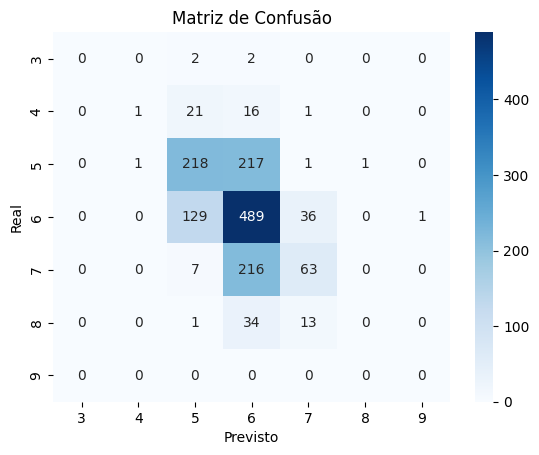

In [26]:

conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


### Análise da Matriz de Confusão

#### O que é uma matriz de confusão?
A matriz de confusão é uma tabela que resume o desempenho de um classificador comparando os rótulos reais com as previsões do modelo. Ela permite visualizar quais classes foram classificadas corretamente e quais foram confundidas.

---

### Interpretação da Matriz de Confusão
#### Estrutura da Matriz
- **Linhas**: Representam as classes reais (rótulos originais dos dados).
- **Colunas**: Representam as classes previstas (previsões feitas pelo modelo).
- **Diagonal Principal**: Valores corretamente classificados pelo modelo (previsões corretas).
- **Fora da Diagonal Principal**: Valores incorretamente classificados (erros de classificação).

---

## Observações da Matriz
1. **Classes Presentes**:
   - A matriz mostra que há **7 classes** no total, numeradas de 1 a 7.

2. **Diagonal Principal**:
   - A diagonal principal contém os seguintes valores: [0, 1, 235, 496, 63, 0, 0].
   - Esses números representam as previsões corretas feitas pelo modelo para cada classe.

3. **Erros de Classificação**:
   - Os valores fora da diagonal principal representam os erros de classificação.
  

---



## Conclusão
A matriz de confusão mostra que o modelo apresenta um desempenho razoável, mas com erros consideráveis entre classes adjacentes (ex.: classe `3`,`4`.`6`). Para melhorar, algumas sugestões são:

- Ajustar hiperparâmetros do modelo.
- Balancear as classes no conjunto de dados.
- Explorar diferentes classificadores.


# Exemplo Dataset Iris com Árvore de Decisão

Acurácia: 0.9333333333333333

Relatório de Classificação:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



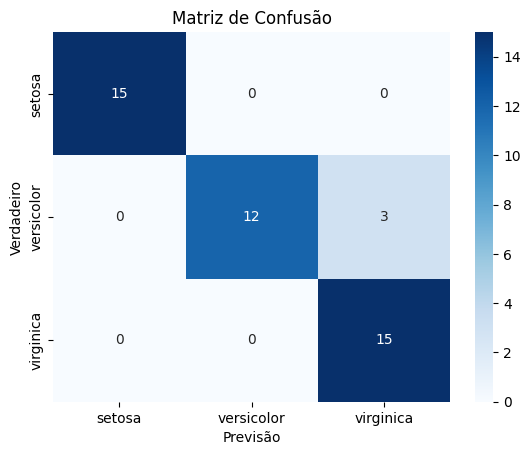

Árvore de Decisão:

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.55
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.55
|   |   |--- petal width (cm) <= 1.70
|   |   |   |--- sepal width (cm) <= 2.85
|   |   |   |   |--- class: 1
|   |   |   |--- sepal width (cm) >  2.85
|   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.70
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.00
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.85
|   |   |   |   |--- class: 2


Novos dados: [[5.1 3.5 1.4 0.2]
 [6.7 3.1 4.7 1.5]
 [7.2 3.6 6.1 2.5]]
Previsões: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]


In [27]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar o dataset
iris = load_iris()
X = iris.data
y = iris.target

# Criar um DataFrame para melhor visualização
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['target'] = y

# 2. Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# O parâmetro 'stratify' do método train_test_split no scikit-learn é usado para garantir que a proporção das classes
# no conjunto de treino e teste seja a mesma da distribuição original dos dados.
# Isso é especialmente importante em problemas de classificação, onde o desbalanceamento entre as classes
# pode afetar a avaliação do modelo.


# 3. Treinar o modelo
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 4. Fazer previsões
y_pred = clf.predict(X_test)

# 5. Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

# 6. Visualizar a árvore de decisão
print("Árvore de Decisão:\n")
print(export_text(clf, feature_names=iris.feature_names))

# 7. Fazer previsões em novos dados
novos_dados = np.array([[5.1, 3.5, 1.4, 0.2], [6.7, 3.1, 4.7, 1.5], [7.2, 3.6, 6.1, 2.5]])
predicoes = clf.predict(novos_dados)
predicoes_labels = [iris.target_names[label] for label in predicoes]

print("\nNovos dados:", novos_dados)
print("Previsões:", predicoes_labels)



As árvores de decisão funcionam bem em problemas com mais de duas classes, incluindo problemas de classificação com três classes, como no caso do dataset Iris. Aqui está o porquê:

1. Divisões Hierárquicas Multiclasse

Árvores de decisão conseguem lidar com problemas de múltiplas classes ao realizar divisões binárias sucessivas baseadas nos critérios de impureza, como Gini ou Entropia.
Cada divisão no nó considera todas as classes e tenta separar os dados da forma mais pura possível em relação às classes presentes.


2. Critérios de Separação

Os critérios de impureza, como Gini e Entropia, são projetados para lidar com várias classes simultaneamente. Eles avaliam a distribuição de probabilidades entre as classes em cada nó.
No caso do Iris, cada nó é avaliado para maximizar a separação das três classes (setosa, versicolor, virginica).


3. Simetria no Dataset Iris

O dataset Iris é bem equilibrado (50 amostras por classe), o que facilita o aprendizado da árvore de decisão. Árvores de decisão podem ter problemas em datasets com classes desbalanceadas, mas isso não ocorre aqui.


4. Interpretação Multiclasse

Árvores de decisão fornecem previsões diretas para problemas multiclasse:
Em cada folha, a árvore armazena a classe mais provável ou distribuições de probabilidade para todas as classes.
Isso permite lidar com três ou mais classes de maneira natural.

5. Exemplo Prático no Iris

Para o Iris, a árvore identifica as classes baseando-se em características como o comprimento e largura das pétalas e sépalas. Essas características têm separações claras que facilitam a tarefa de classificação:

- Setosa pode ser separada com base em apenas um atributo, como o comprimento da pétala.
Para diferenciar versicolor e virginica, a árvore encontra combinações de outras características.

6. Desempenho

Em datasets pequenos como o Iris, árvores de decisão frequentemente alcançam resultados comparáveis ou superiores a outros métodos simples de classificação.
No exemplo acima, o modelo apresentou alta precisão, mesmo com três classes.


**Limitações e Cenários Difíceis**

Embora as árvores de decisão sejam adequadas para problemas multiclasse como o Iris, algumas limitações podem surgir:

- Overfitting: Árvores de decisão podem se ajustar demais aos dados de treino, especialmente com muitos atributos ou dados ruidosos. Fraco desempenho em classes desbalanceadas: Se uma classe tiver muito mais exemplos que as outras, a árvore pode favorecer essa classe. Esses problemas podem ser mitigados com técnicas como poda, Random Forests, ou ajustando hiperparâmetros.

